Loading the .csv into a Dataframe

In [68]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

# Convert to a Dataframe
Full_Solar_Data = pd.read_csv('SolarData.csv',sep=',')
rawSolarData_Unclean = pd.read_csv('SolarData.csv',sep=',') # Load .csv file into the a pandas data frame. Hopefully this wont sprawl your device
rawSolarData_Unclean.value_counts()


flare      start.date  start.time  peak      end       duration.s  peak.c/s  total.counts  energy.kev  x.pos.asec  y.pos.asec  radial  active.region.ar  flag.1  flag.2  flag.3  flag.4  flag.5
2021310    2002-02-13  07:03:52    07:05:14  07:07:48  236         336       313392        25-50       -272         390        476     9825              A1      GS      P1      PE      Q2        1
14021657   2014-02-16  15:37:00    15:38:46  15:42:36  336         68        73056         6-12        -961        -213        985     0                 A0      DR      P1      PE      Q2        1
14021629   2014-02-16  07:41:20    07:41:38  07:46:28  308         40        59040         6-12         134         783        795     0                 A0      DR      P1      PE      Q2        1
14021630   2014-02-16  08:22:32    08:24:18  08:27:16  284         72        38448         6-12        -955        -186        973     0                 A0      DR      P1      PE      Q2        1
14021643   2014-02-1

### Histogram of: (1st attempt)
1. duration
2. peak

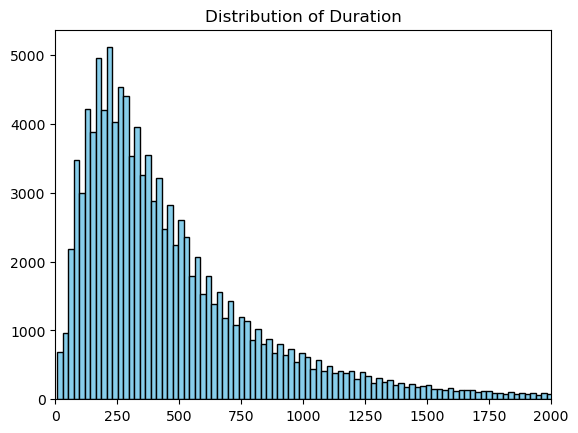

In [69]:
# distribution: Duration 
plt.hist(rawSolarData_Unclean['duration.s'],bins=200, color='skyblue', edgecolor='black')
plt.xlim(0,2000)
plt.title("Distribution of Duration")
plt.show()

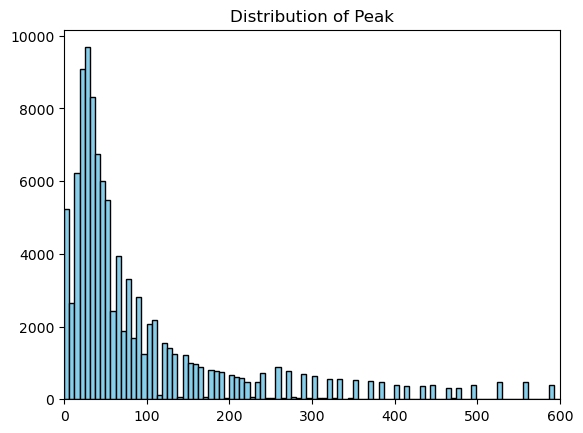

In [70]:
# distribution Peak
PeakSemiClean=[]
for value in rawSolarData_Unclean['peak.c/s']:
    if value < 1250:
        PeakSemiClean.append(value)
plt.hist(PeakSemiClean,bins=200, color='skyblue', edgecolor='black')
plt.xlim(0,600) # Focus on [0,600]
plt.title("Distribution of Peak")
plt.show()

### Scatterplot of: (1st Attempt):
1. Peaks vs. Duration

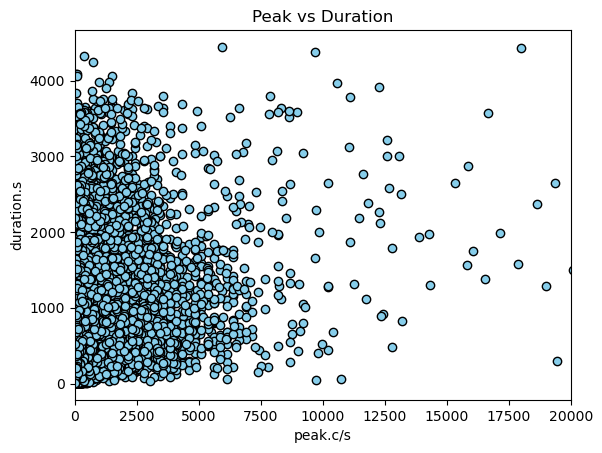

In [71]:
# Peaks vs Duration

plt.scatter(rawSolarData_Unclean['peak.c/s'], rawSolarData_Unclean['duration.s'], color='skyblue', edgecolor='black')
plt.xlim(0,20000)
plt.title('Peak vs Duration')
plt.xlabel('peak.c/s')
plt.ylabel('duration.s')
plt.show()

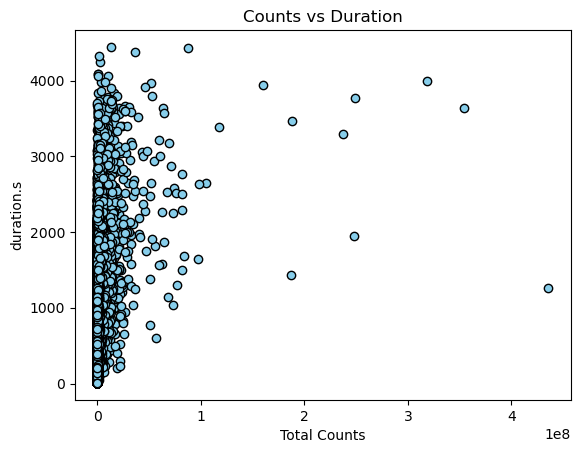

In [72]:
# Counts vs Duration

plt.scatter(rawSolarData_Unclean['total.counts'], rawSolarData_Unclean['duration.s'], color='skyblue', edgecolor='black')

plt.title('Counts vs Duration')
plt.xlabel('Total Counts')
plt.ylabel('duration.s')
plt.show()

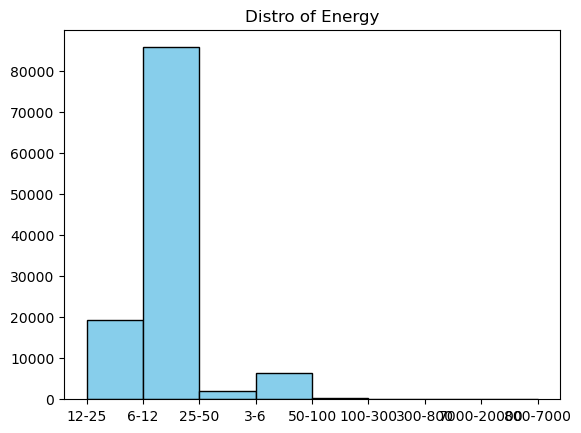

In [79]:
# Hist of Energy

plt.hist(Full_Solar_Data['energy.kev'], bins=8, color='skyblue', edgecolor='black')

plt.title('Distro of Energy')
# plt.xlabel('Total Counts')
# plt.ylabel('duration.s')
plt.show()


In [74]:
# # Solar events per day


# # ~ ~ ~ ~ Hash Alg ~ ~ ~ #
# days = []
# for date in Full_Solar_Data["start.date"]:
#     daysInMonth = 31
#     month = date[5:7]
#     if month == "04" or month == "06" or month == "09" or month == "11":
#         daysInMonth = 30
#     elif month == "02":
#         daysInMonth = 28
#     day = int(date[8:]) + int(date[5:7])*daysInMonth + int(date[:4])*365 - 730798
#     #print(day)
#     days.append(day)

# # ~ ~ ~ ~ End Hash ~ ~ ~ #

# currentdate = ""
# currentTrack = 0
# DatePairs = {}
# for C in Full_Solar_Data['start.date']:
#     if C == currentdate:
#         currentTrack += 1
#     else:
#         if currentdate:  # Check if currentdate is not empty
#             DatePairs[currentdate] = currentTrack
#         currentdate = C
#         currentTrack = 1

# # Add the last date and its count to DatePairs
# if currentdate:
#     DatePairs[currentdate] = currentTrack

# # plt.scatter(DatePairs.keys(),DatePairs.values(), color='skyblue', edgecolor='black')
# # plt.title('Date vs Count')
# # plt.xlabel('Date')
# # plt.ylabel('Events per Day')
# # plt.show()

In [75]:
# Nathan's Day Year Hash
days = []
for date in Full_Solar_Data["start.date"]:
    daysInMonth = 31
    month = date[5:7]
    if month == "04" or month == "06" or month == "09" or month == "11":
        daysInMonth = 30
    elif month == "02":
        daysInMonth = 28
    day = int(date[8:]) + int(date[5:7])*daysInMonth + int(date[:4])*365 - 730798
    #print(day)
    days.append(day)


## Prediction Models

In [76]:
# Energy Predict Model

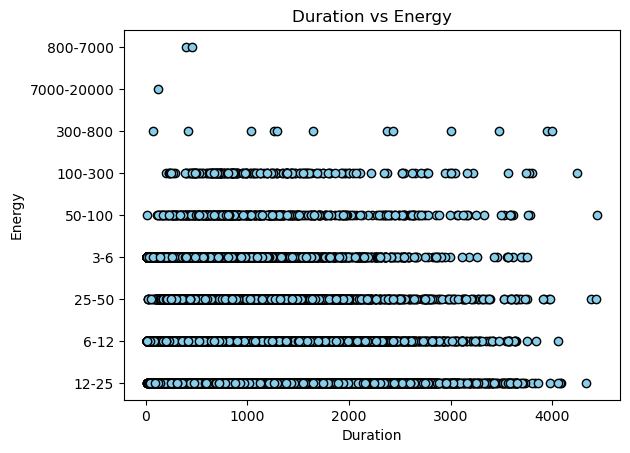

In [78]:
# Duration vs Energy

Duration = Full_Solar_Data['duration.s']


Energy = Full_Solar_Data['energy.kev']

plt.scatter(Full_Solar_Data['duration.s'], Full_Solar_Data['energy.kev'], color='skyblue', edgecolor='black')

plt.title('Duration vs Energy')
plt.xlabel('Duration')
plt.ylabel('Energy')
plt.show()

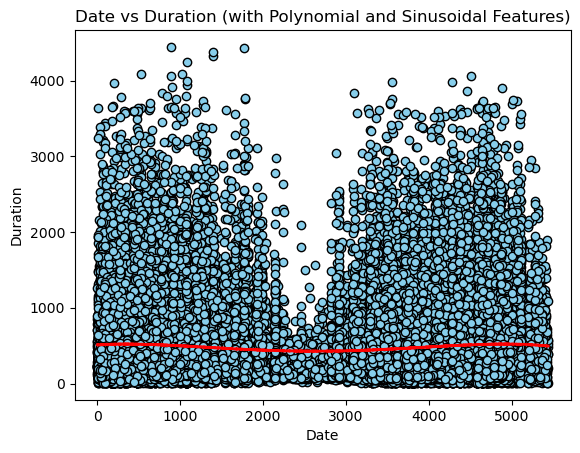

In [96]:
# Date vs Duration
# days = []
# for date in Full_Solar_Data["start.date"]:
#     daysInMonth = 31
#     month = date[5:7]
#     if month == "04" or month == "06" or month == "09" or month == "11":
#         daysInMonth = 30
#     elif month == "02":
#         daysInMonth = 28
#     day = int(date[8:]) + int(date[5:7])*daysInMonth + int(date[:4])*365 - 730798
#     #print(day)
#     days.append(day)

# plt.scatter(days,Full_Solar_Data['duration.s'], color='skyblue', edgecolor='black')
from sklearn.linear_model import LinearRegression


# # Shuffle the data
# indices = np.random.permutation(len(Full_Solar_Data))
# shuffled_days = np.array(days)[indices]
# shuffled_durations = np.array(Full_Solar_Data['duration.s'])[indices]

# # Reshape the shuffled_days array
# shuffled_days = shuffled_days.reshape(-1, 1)

# # Fit linear regression model
# model = LinearRegression()
# model.fit(shuffled_days, shuffled_durations)

# # Predict durations
# predicted_durations = model.predict(shuffled_days)

# # Plot the shuffled data and regression line
# plt.scatter(shuffled_days, shuffled_durations, color='skyblue', edgecolor='black')
# plt.plot(shuffled_days, predicted_durations, color='red', linewidth=2)

# plt.title('Date vs Duration')
# plt.xlabel('Date')
# plt.ylabel('Duration')
# plt.show()
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

# Shuffle the data
indices = np.random.permutation(len(Full_Solar_Data))
shuffled_days = np.array(days)[indices]
shuffled_durations = np.array(Full_Solar_Data['duration.s'])[indices]

# Reshape the shuffled_days array
shuffled_days = shuffled_days.reshape(-1, 1)

# Create polynomial and sinusoidal features
poly = PolynomialFeatures(degree=4)  # You can adjust the degree as needed
X_poly = poly.fit_transform(shuffled_days)
X_with_sin = np.concatenate((X_poly, np.sin(shuffled_days)), axis=1)

# Fit linear regression model
model = LinearRegression()
model.fit(X_with_sin, shuffled_durations)

# Predict durations
predicted_durations = model.predict(X_with_sin)

# Sort the shuffled_days for better visualization
sorted_indices = np.argsort(shuffled_days[:,0])
sorted_days = shuffled_days[sorted_indices]
sorted_predicted_durations = predicted_durations[sorted_indices]

# Plot the shuffled data and regression line
plt.scatter(shuffled_days, shuffled_durations, color='skyblue', edgecolor='black')
plt.plot(sorted_days, sorted_predicted_durations, color='red', linewidth=2)

plt.title('Date vs Duration (with Polynomial and Sinusoidal Features)')
plt.xlabel('Date')
plt.ylabel('Duration')
plt.show()